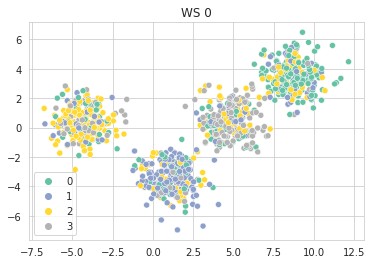

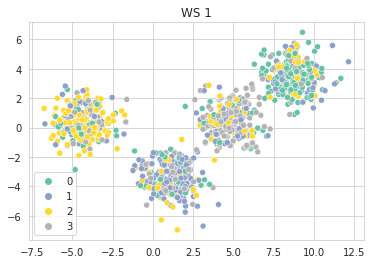

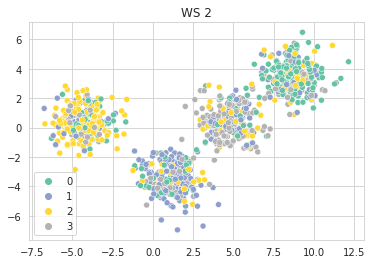

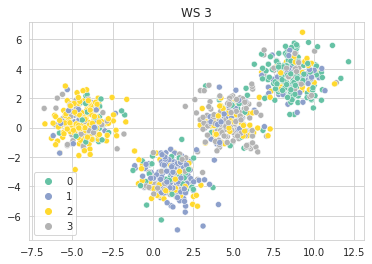

<Figure size 432x288 with 0 Axes>

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import random

sns.set_style("whitegrid")

n_samples = 1000
n_classes = 4
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=n_classes)

# generate some ys from WS
weak_ys = []

for i in range(0, 4):
    random_noise = np.array(
        [
            random.choice([-1, -1, -1] + list(range(0, n_classes)))
            for _ in range(0, len(y))
        ]
    )
    y_new = np.copy(y)
    y_new[np.where(random_noise != -1)] = random_noise[np.where(random_noise != -1)]
    weak_ys.append(y_new)

    fig = sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y_new, palette=sns.color_palette("Set2", as_cmap=True)
    )
    fig.set_title("WS " + str(i))
    plt.show()
    plt.clf()


Text(0.5, 1.0, 'Ground Truth')

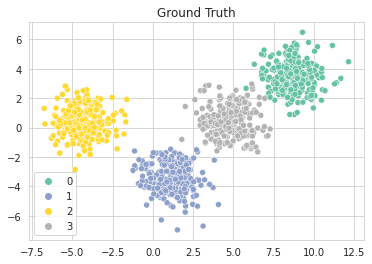

In [3]:
# ground truth
fig = sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, palette=sns.color_palette("Set2", as_cmap=True)
)
fig.set_title("Ground Truth")


Text(0.5, 1.0, 'Standard k-means')

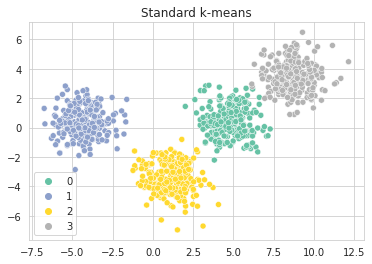

In [4]:
# k-means
cluster = KMeans(n_clusters=n_classes).fit_predict(X)

fig = sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=cluster, palette=sns.color_palette("Set2", as_cmap=True)
)
fig.set_title("Standard k-means")


[[ 4.72607183  0.4447404 ]
 [-4.32724672  0.42140856]
 [ 8.69286967  3.46318337]
 [ 1.11924279 -3.48251924]]
[[ 4.72607183  0.4447404 ]
 [-4.32724672  0.42140856]
 [ 8.69286967  3.46318337]
 [ 1.11924279 -3.48251924]]


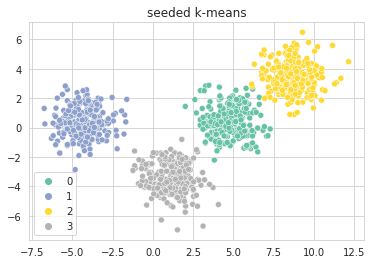

In [9]:
# seeded k-means
seed_medoids = []

for y_ws in weak_ys:
    for c in np.unique(y_ws):
        # calculate medoid
        medoid = np.mean(X[np.where(y_ws == c)], axis=0)
        seed_medoids.append(medoid)

# cluster medoids
medoid_clusters = KMeans(n_clusters=n_classes)
medoid_clusters.fit(seed_medoids)

kmeans = KMeans(n_clusters=n_classes, init=medoid_clusters.cluster_centers_, n_init=1).fit(X)
cluster = kmeans.predict(X)
print(kmeans.cluster_centers_)

fig = sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=cluster, palette=sns.color_palette("Set2", as_cmap=True)
)
fig.set_title("seeded k-means")
plt.show()